<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/intro_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy

### Calculus and Equations

$$3x + 7 = 8$$

$$3(1/3) + 7 = 8$$

What would an equation with a derivative look like? What would a solution look like? 🤔

$$\frac{dy}{dx} = x$$

Can you think of a function whose derivative is $x$?

What would a solution to

$$\frac{dy}{dx} = x^2$$

be?

Changing the notation, we recognize that a function is a solution if it results in a true equation.  Take for example:

$$y' + 8y = 0; y = 4e^{-8x}$$

Is $y$ a solution?

In [97]:
#derivative of y = ?


For each of the following differential equations, verify (by hand or computer) if the given function is a solution.

1. $y' + 8x = 0$, $y = 4x^2$
2. $yy' + 4x = 0$, $y = \sqrt{12 - 4x^2}$
3. $y' + 4xy = 0$, $y = 3e^{-2x^2}$

In [98]:
x, y = sy.symbols('x y')

In [99]:
sy.diff(4*x**2, x) + 8*x

16*x

In [100]:
y = sy.sqrt(12 - 4*x**2)
y*sy.diff(y, x) + 4*x

0

In [101]:
y = 3*sy.exp(-2*x**2)
sy.diff(y, x) + 4*x*y

0

### Visualizing Solutions

Usually, all we will have is the differential equation and not know a solution.  While we will see some strategies for solving differential equations, this is a very hard problem most of the time.  Instead, we can get a feel for what the solution looks like with a *slope field*.

In [102]:
x = np.arange(-4, 4, 1)
y = np.arange(-4, 4, 1)

In [103]:
X, Y = np.meshgrid(x, y)

Below, consider the grid of points and the differential equation

$$\frac{dy}{dx} = x$$

representing the slope of a small line at each point.  Draw an *isocline* to represent the slope of each point.

- (0, 0)
- (1, 1)
- (-1, 1)
- (-2, 4)
- (2, 4)

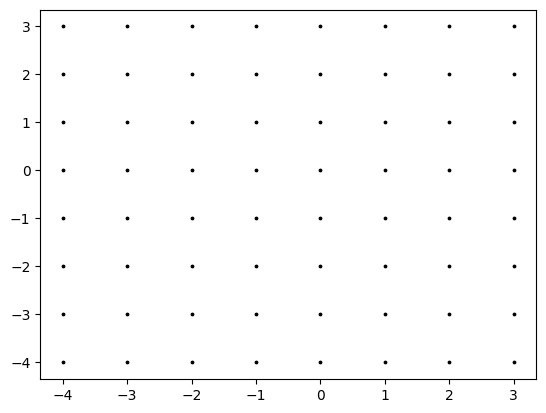

In [104]:
plt.scatter(X, Y, color = 'black', s = 3);

In [105]:
dy = X
dx = np.ones(dy.shape)

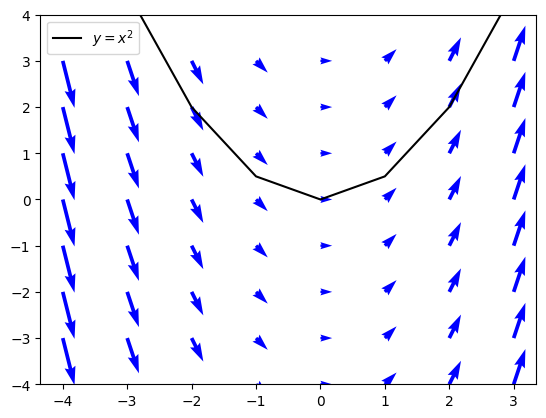

In [106]:
plt.quiver(X, Y, dx, dy, color = 'blue')
plt.plot(x, .5*x**2, color = 'black', label = r'$y = x^2$')
plt.ylim(-4, 4)
plt.legend();

$$\frac{dy}{dx} = x + \sin(y) $$

In [107]:
x = np.arange(-3, 2, .3)
y = np.arange(-2, 2, .3)
X, Y = np.meshgrid(x, y)

In [108]:
dy = X + np.sin(Y)
dx = np.ones(dy.shape)

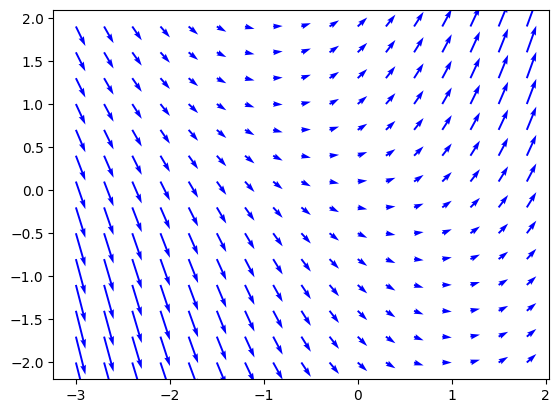

In [109]:
plt.quiver(X, Y, dx, dy, color = 'blue')

We can scale the results so that the arrows are all the same length as follows.

In [110]:
#make arrows length 1
dys = dy/np.sqrt(dx**2 + dy**2)
dxs = dx/np.sqrt(dx**2 + dy**2)

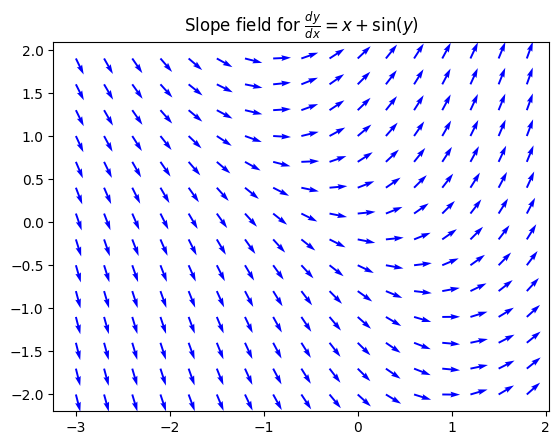

In [111]:
plt.quiver(X, Y, dxs, dys, color = 'blue')
plt.title(r'Slope field for $\frac{dy}{dx} = x + \sin(y)$');

Draw the slope fields for the following differential equations:

1. $$\frac{dy}{dx} = -xy$$

2. $$\frac{dy}{dx} = y - x$$

3. $$\frac{dy}{dx} = -3(y - 30)$$

In [112]:
#define x and y
x = np.arange(-3, 2, .3)
y = np.arange(-2, 2, .3)
X, Y = np.meshgrid(x, y)

In [113]:
dy = -X*Y
dx = np.ones(dy.shape)

In [114]:
dy = dy/np.sqrt(dy**2 + dx**2)
dx = dx/np.sqrt(dy**2 + dx**2)

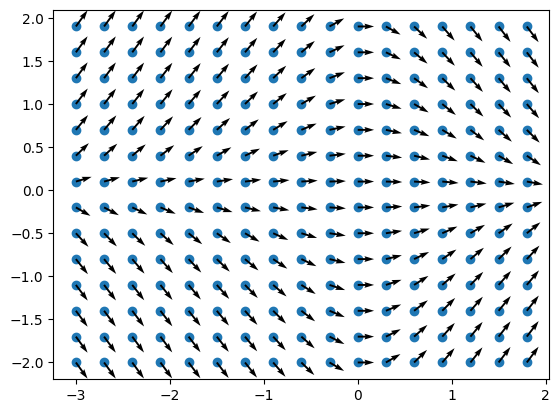

In [115]:
plt.scatter(X,Y)
plt.quiver(X, Y, dx, dy)

In [116]:
dy = -3*(Y - 30)
dx = np.ones(dy.shape)
dy = dy/np.sqrt(dx**2 + dy**2)
dx = dx/np.sqrt(dx**2 + dy**2)

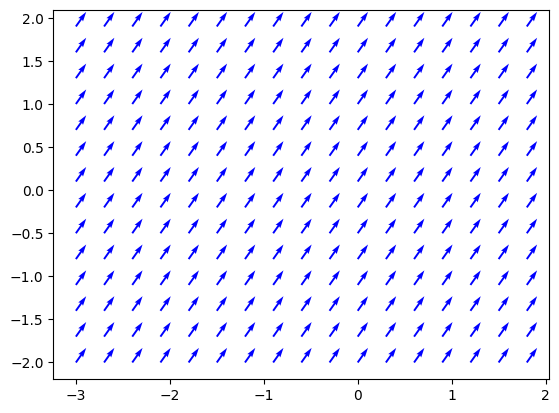

In [117]:
plt.quiver(X, Y, dx, dy, color = 'blue')

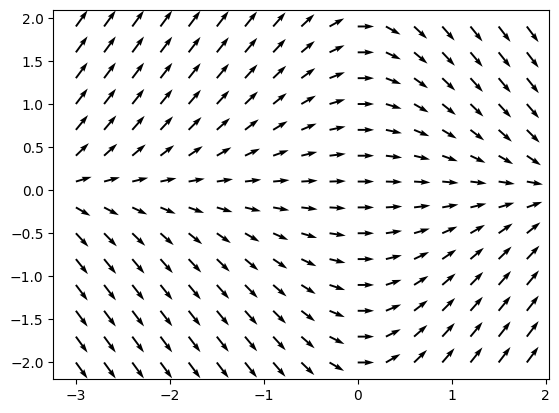

In [118]:
#number 1
x = np.arange(-3, 2, .3)
y = np.arange(-2, 2, .3)
X, Y = np.meshgrid(x, y)
dy = -X*Y
dx = np.ones(dy.shape)
dy = dy/np.sqrt(dx**2 + dy**2)
dx = dx/np.sqrt(dx**2 + dy**2)
plt.quiver(X, Y, dx, dy)

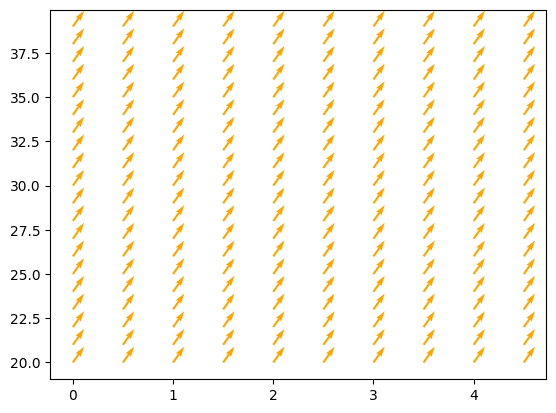

In [119]:
x = np.arange(0, 5, .5)
y = np.arange(20, 40, 1)
X, Y = np.meshgrid(x, y)
dy = Y - X
dx = np.ones(dy.shape)
dy = dy/np.sqrt(dx**2 + dy**2)
dx = dx/np.sqrt(dx**2 + dy**2)
plt.quiver(X, Y, dx, dy, color = 'orange')

**Applications**

Suppose we have a constant growth in a population.  What would this look like as a differential equation?  For example, suppose a population of fish grew by 5 each year.

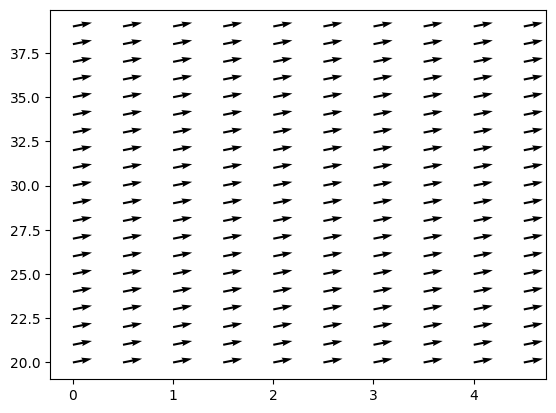

In [120]:
dy = 5
dx = np.ones(1)
X, Y = np.meshgrid(x, y)
plt.quiver(X, Y, dy, dx)

Draw a slope field for the model.

What if the population were to grow by 10% each year?  What would a differential equation be?  Can you find a solution to this?

ValueError: Argument U has a size 200 which does not match 400, the number of arrow positions

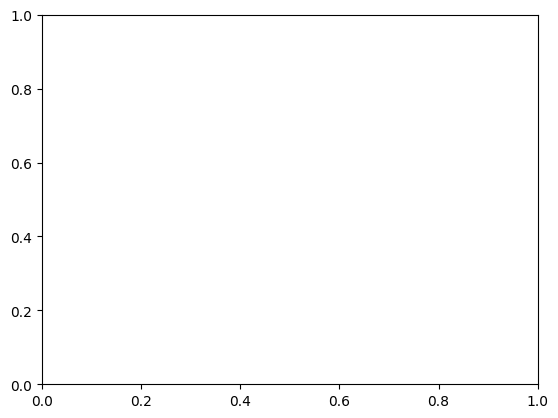

In [121]:
x = np.arange(0,20,1)
y = np.arange(0,20,1)
dy = .1*X
dx = np.ones(dy.shape)
X, Y = np.meshgrid(x, y)
plt.quiver(X, Y, dy, dx)

### Solutions to Differential Equations

We will discuss some strategies for exact solutions next class, but for now we can approximate solutions by letting the isoclines guide us.  

Suppose we have $$y' = y - x^2$$ and $$y(0) = 3$$

if we take steps of size $h = 0.2$ we have

$$y_1 = y_0 + hF(x_0, y_0)$$
$$y_2 = y_1 + hF(x_1, y_1)$$
$$y_3 = y_2 + hF(x_2, y_2)$$

In [122]:
y0 = 3
h = .2
y1 = y0 + h*(3 - 0**2)
y1

3.6

In [123]:
y2 = y1 + h*(3.6 - .2**2)
y2

4.312

In [124]:
ys = [5]
xs = [1]
for i in range(20):
  ynext = ys[-1] + h*(ys[-1] + xs[-1]**2)
  ys.append(ynext)
  xs.append(xs[-1] + h)

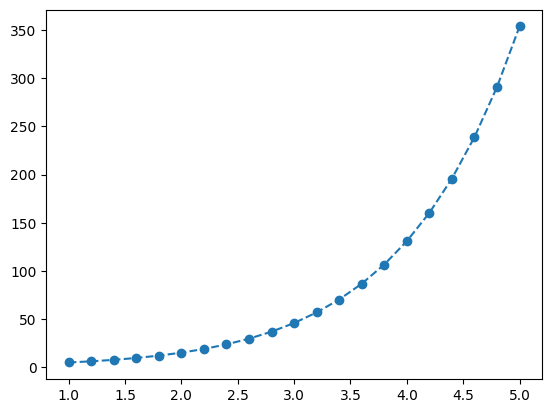

In [125]:
plt.plot(xs, ys, '--o')

(0.0, 3.0)

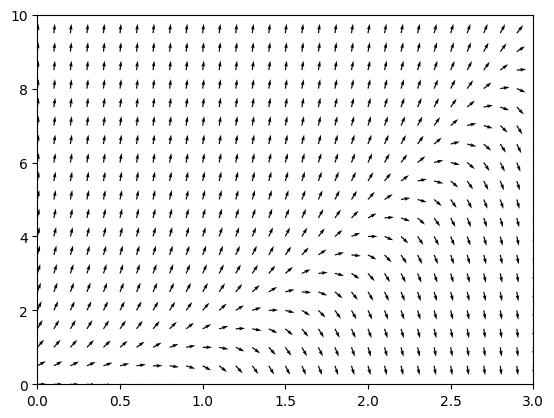

In [126]:
x = np.arange(0, 4, .1)
y = np.arange(0, 10, .5)
X, Y = np.meshgrid(x, y)
dx = np.ones(Y.shape)
dy = Y - X**2
dx = dx/np.sqrt(dx**2 + dy**2)
dy = dy/np.sqrt(dx**2 + dy**2)
plt.quiver(X, Y, dx, dy)
# plt.plot(xs, ys, '--r')
plt.ylim(0, 10)
plt.xlim(0, 3)

Let $$\frac{dy}{dx} = \sin(x)\cos(y)$$
and $$y(0) = 0$$

Use $h=0.1$ to approximate $y(0.5)$.

In [127]:
y1 = 0 + .1*(np.sin(0)*np.cos(0))
y1

np.float64(0.0)

In [128]:
y2 = 0 + .1*(np.sin(.1)*np.cos(0))
y2

np.float64(0.009983341664682815)

In [129]:
y3 = y2 + .1*(np.sin(.2)*np.cos(y2))
y3

np.float64(0.029849284712501596)

In [130]:
y4 = y3 + .1*(np.sin(.3)*np.cos(y3))
y4

np.float64(0.05938814122939546)

In [131]:
y5 = y4 + .1*(np.sin(.4)*np.cos(y4))
y5

np.float64(0.09826132266494536)

For each of the following differential equations draw the slope field and use $h = 0.1$ to approximate the given value of $y(x)$.

1. $y(0.5)$; $y' = y^2, y(0) = 0$


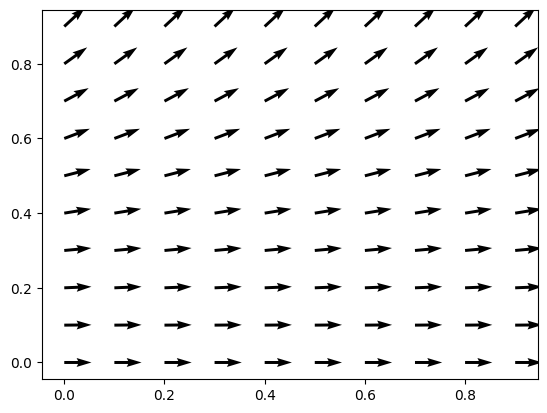

In [132]:
x = np.arange(0, 1, .1)
y = np.arange(0, 1, .1)
X, Y = np.meshgrid(x, y)
dx = np.ones(Y.shape)
dy = Y**2
dx = dx/np.sqrt(dx**2 + dy**2)
dy = dy/np.sqrt(dx**2 + dy**2)
plt.quiver(X, Y, dx, dy)

2. $y(1); y' = y, y(0) = 0$

3. $y(1.5), y' = x\sin(y), y(1) = 2$

In [135]:
y0 = 2
h = .1
y1 = y0 + h*(1*np.sin(2))
y1

np.float64(2.0909297426825684)

In [136]:
y2 = y1 + h*(1.1 * np.sin(y1))
y2

np.float64(2.186382559510034)

In [139]:
y3 = y2 + h*(1.2*np.sin(y2))
y3

np.float64(2.28435476846316)

In [141]:
y4 = y3 + h*(1.3*np.sin(y3))
y4

np.float64(2.382639652180675)

In [142]:
y5 = y4 + h*(1.4*np.sin(y4))
y5

np.float64(2.4789823553321173)